In [127]:
import numpy as np
import pandas as pd

In [115]:
df=pd.read_csv("bitcoin_dataset.csv")

In [116]:
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [117]:
df.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [118]:
a = df['btc_market_price']

In [119]:
a[1023]

13.6888

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

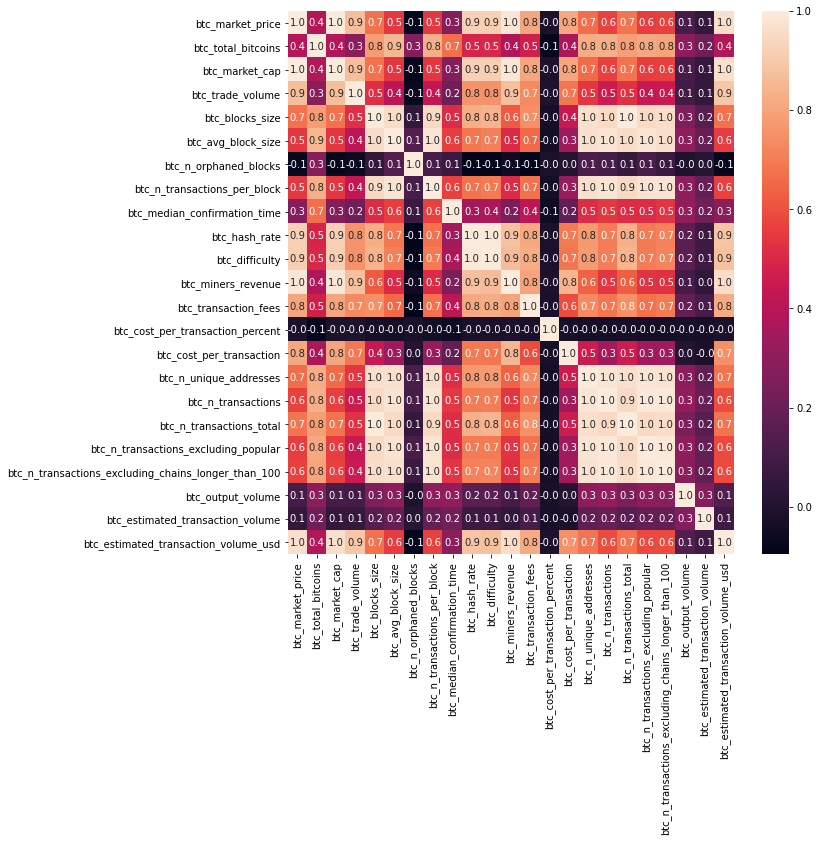

In [121]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [123]:
df.corr()["btc_market_price"]

btc_market_price                                       1.000000
btc_total_bitcoins                                     0.392474
btc_market_cap                                         0.999783
btc_trade_volume                                       0.868813
btc_blocks_size                                        0.674507
btc_avg_block_size                                     0.544033
btc_n_orphaned_blocks                                 -0.076400
btc_n_transactions_per_block                           0.544125
btc_median_confirmation_time                           0.275250
btc_hash_rate                                          0.920876
btc_difficulty                                         0.916937
btc_miners_revenue                                     0.986732
btc_transaction_fees                                   0.806595
btc_cost_per_transaction_percent                      -0.013517
btc_cost_per_transaction                               0.815507
btc_n_unique_addresses                  

In [124]:
df.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [125]:
#features and label
X=df[["btc_market_price","btc_total_bitcoins","btc_miners_revenue","btc_cost_per_transaction","btc_hash_rate","btc_difficulty","btc_cost_per_transaction_percent"]]
y=df["btc_market_price"]

In [128]:
#fill nan
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X= imputer.transform(X)

In [132]:
from sklearn.model_selection import train_test_split 

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [134]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2324, 1)
(582, 1)
(2324,)
(582,)


In [138]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [139]:
from sklearn.metrics import mean_squared_error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))

Mean squared error: 5.658238593467679e-16
